<a href="https://colab.research.google.com/github/Martinccv/Clases-DS/blob/main/Clase26_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging

Vamos a utilizar el siguiente dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Las siguientes celdas lo descargan e importan:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1X0MT5YFVOduVogJ9cZKjCJ7fs-OdVuAT' -O weather.csv

In [2]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1X0MT5YFVOduVogJ9cZKjCJ7fs-OdVuAT')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Vamos a descartar las columnas:

- Sunshine          
- Evaporation       
- Cloud3pm          
- Cloud9am  
- Location
- Date       
- WindGustDir
- WindDir9am

In [4]:
#COMPLETAR
df_clean = df.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Location', 'Date', 'WindGustDir', 'WindDir9am'], axis=1)

Descartar todas las filas que tengan nulos:

In [5]:
#COMPLETAR
df_clean = df_clean.dropna()

Separamos en X e y. Nuestro objetivo es predecir si va a llover mañana.

In [6]:
#COMPLETAR
X = df_clean.drop('RainTomorrow', axis=1)
y = df_clean['RainTomorrow']

In [25]:
y

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 119016, dtype: object

Aplicamos train test split. El set de test tendrá un 20% de los datos con un random state de 42 y stratify.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
y_train

140197     No
138387     No
27191      No
87705      No
113270    Yes
         ... 
137106     No
58276      No
47721      No
84932      No
121715     No
Name: RainTomorrow, Length: 95212, dtype: object

Aplicar one hot encoder a las variables categóricas.

Recuerden hacer fit en train y luego en test solo transform.

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

In [34]:
categorical_columns = ['WindDir3pm', 'RainToday']
categorical_columns

['WindDir3pm', 'RainToday']

In [10]:
#COMPLETAR
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [18]:
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Dropear las columnas originales:

In [35]:
#COMPLETAR
X_train = X_train.drop(categorical_columns, axis=1)
X_test = X_test.drop(categorical_columns, axis=1)

In [36]:
X_train

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
140197,17.6,30.3,0.0,31.0,15.0,13.0,59.0,24.0,1014.0,1010.1,21.3,29.5
138387,-0.6,18.3,0.0,28.0,0.0,9.0,51.0,21.0,1026.8,1022.0,7.7,17.6
27191,19.8,27.6,0.0,33.0,15.0,13.0,57.0,40.0,1019.8,1017.4,21.5,27.2
87705,22.6,29.7,1.4,41.0,24.0,28.0,73.0,65.0,1011.9,1009.4,25.9,28.8
113270,12.8,18.7,0.4,50.0,22.0,28.0,78.0,71.0,1018.6,1016.5,16.7,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
137106,10.9,25.6,19.8,44.0,17.0,26.0,78.0,29.0,1018.0,1013.4,14.3,24.9
58276,7.7,27.6,0.0,43.0,9.0,28.0,38.0,16.0,1015.4,1010.4,17.7,27.1
47721,7.9,29.3,0.0,33.0,7.0,11.0,68.0,33.0,1021.1,1016.5,17.3,27.6
84932,21.9,29.6,40.0,33.0,13.0,17.0,70.0,70.0,1010.6,1009.6,27.7,28.2


Llevar el target a una variable numérica:

- 1 si va a llover mañana
- 0 si no va a llover mañana

In [30]:
#COMPLETAR
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

In [31]:
y_test

145027    0
33937     0
137500    1
92754     0
97797     1
         ..
98905     0
46681     1
43403     0
65901     1
90884     0
Name: RainTomorrow, Length: 23804, dtype: int64

Entrenar un arbol de decision con:
- max_depth=10
- random_state=0

y obtener el classification report para train y test.

In [33]:
X_train

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
140197,17.6,30.3,0.0,31.0,NW,15.0,13.0,59.0,24.0,1014.0,1010.1,21.3,29.5,No
138387,-0.6,18.3,0.0,28.0,E,0.0,9.0,51.0,21.0,1026.8,1022.0,7.7,17.6,No
27191,19.8,27.6,0.0,33.0,ENE,15.0,13.0,57.0,40.0,1019.8,1017.4,21.5,27.2,No
87705,22.6,29.7,1.4,41.0,SE,24.0,28.0,73.0,65.0,1011.9,1009.4,25.9,28.8,Yes
113270,12.8,18.7,0.4,50.0,NW,22.0,28.0,78.0,71.0,1018.6,1016.5,16.7,18.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137106,10.9,25.6,19.8,44.0,SE,17.0,26.0,78.0,29.0,1018.0,1013.4,14.3,24.9,Yes
58276,7.7,27.6,0.0,43.0,NW,9.0,28.0,38.0,16.0,1015.4,1010.4,17.7,27.1,No
47721,7.9,29.3,0.0,33.0,NNE,7.0,11.0,68.0,33.0,1021.1,1016.5,17.3,27.6,No
84932,21.9,29.6,40.0,33.0,ENE,13.0,17.0,70.0,70.0,1010.6,1009.6,27.7,28.2,Yes


In [37]:
#COMPLETAR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)
print(classification_report(y_train, tree.predict(X_train)))
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     74409
           1       0.79      0.55      0.65     20803

    accuracy                           0.87     95212
   macro avg       0.84      0.75      0.78     95212
weighted avg       0.86      0.87      0.86     95212

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18603
           1       0.71      0.49      0.58      5201

    accuracy                           0.84     23804
   macro avg       0.79      0.72      0.74     23804
weighted avg       0.83      0.84      0.83     23804



Ahora, usar un Bagging Classifier armado con árboles de decisión:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Los árboles que usemos en este clasificador, deberán tener la misma profundidad máxima (max_depth) que el árbol que entrenamos recién.

Además usar:

- n_estimators = 200
- n_jobs = -1 -> ¿Qué pasa si sacamos esto?
- random_state = 0 -> En el arbol y en el BaggingClassifier

In [47]:
#roc_auc
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, tree.predict(X_test)))

0.7162592202842082


In [38]:
#COMPLETAR
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=10, random_state=0), n_estimators=200, n_jobs=-1, random_state=0)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   random_state=0),
                  n_estimators=200, n_jobs=-1, random_state=0)

In [39]:
#metricas en test
print(classification_report(y_train, bagging.predict(X_train)))
print(classification_report(y_test, bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     74409
           1       0.85      0.56      0.67     20803

    accuracy                           0.88     95212
   macro avg       0.87      0.76      0.80     95212
weighted avg       0.88      0.88      0.87     95212

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18603
           1       0.76      0.50      0.60      5201

    accuracy                           0.86     23804
   macro avg       0.81      0.73      0.76     23804
weighted avg       0.85      0.86      0.84     23804



In [46]:
#roc_auc
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, bagging.predict(X_test)))

0.7276250831191281


Ahora, probar con un RandomForestClassifier.

Los hiperparámetros serán igual que los anteriores:

- max_depth=10
- n_estimators=200
- n_jobs=-1
- random_state=0

In [51]:
#COMPLETAR
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1, random_state=0, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=0)

In [52]:
print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     74409
           1       0.59      0.79      0.68     20803

    accuracy                           0.84     95212
   macro avg       0.76      0.82      0.78     95212
weighted avg       0.86      0.84      0.84     95212

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     18603
           1       0.56      0.74      0.64      5201

    accuracy                           0.82     23804
   macro avg       0.74      0.79      0.76     23804
weighted avg       0.84      0.82      0.82     23804



Ahora, en el random forest, imprimir la importancia de las features:

In [53]:
#roc_auc
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, clf.predict(X_test)))

0.7887560398797353


In [42]:
#COMPLETAR
print(clf.feature_importances_)

[0.02886798 0.02966204 0.12161194 0.08060715 0.01388463 0.01835469
 0.0820344  0.41736094 0.05996774 0.07924615 0.02452318 0.04387915]


Correr el siguiente código para obtener sus feature importances:

In [54]:
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = X_train.columns
fi["IMPORTANCE"] = clf.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

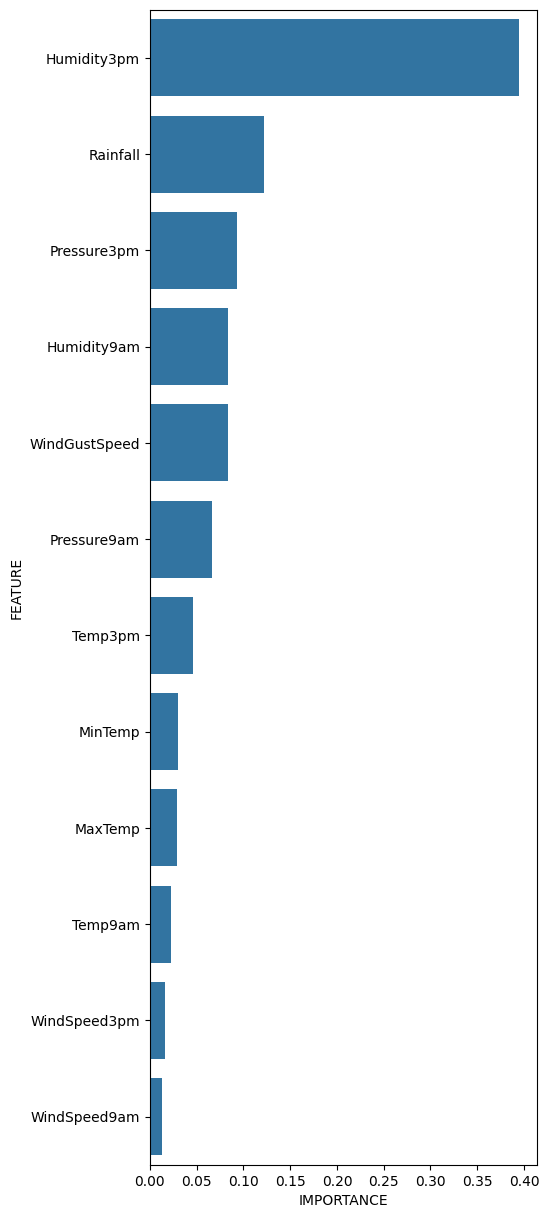

In [55]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

Ahora, aplicar random forest en su proyecto del primer sprint.

Buscar los mejores hiperparámetros con grid search y finalmente imprimir el feature importance de las variables que utilizaron para entrenar.